## Feature Engineering 
### - feature trainsformation
  #### -- Mathematical transformation
   ##### - Log transform
   ##### - Reciprocal transform
   transformation le chai normally distribute garxa normal distribute is very important thing in statistics to make the problem solving easy. If we are working with some algorithm it is important to make the distribution normal transformation 

### Function Transformer 

How to find if the data is normal?
1. sns.displot use garera skweing
2. pd.skew if 0 normal then not normal
3. QQPlot - skewing nai herxa elle ni right skewed haru herxa straight line ma line ma xa bhane normal line ma xaina bhane normal hudena 


### Log Transform 

Data ko log lidine sabai data ko ani log liyo bhane normally distributed bhaihalxa 
right skewed data ma lera aune yo data lai ani normal bhaihalxa log transform use garyo bhane log le additive lai multipicative banuaxa ani tellai distributed banauxa 

### Other Transform 
1. Reciprocol (1/x)
2. sqare transform (x ^2)
3. square root transform (sqrt)




In [114]:
import pandas as pd
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [116]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [126]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [128]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [136]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [138]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [140]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [142]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

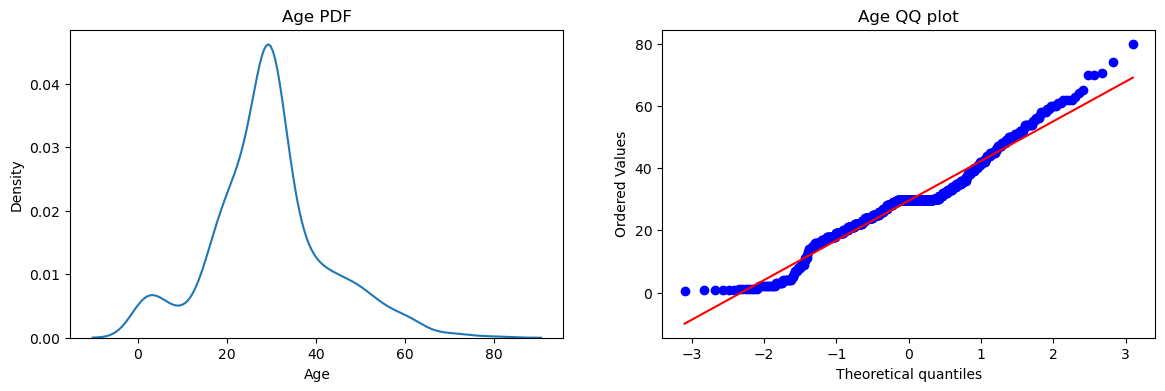

In [144]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm' , plot=plt)
plt.title('Age QQ plot')
plt.show()


It is close to normal but not perfectly normal

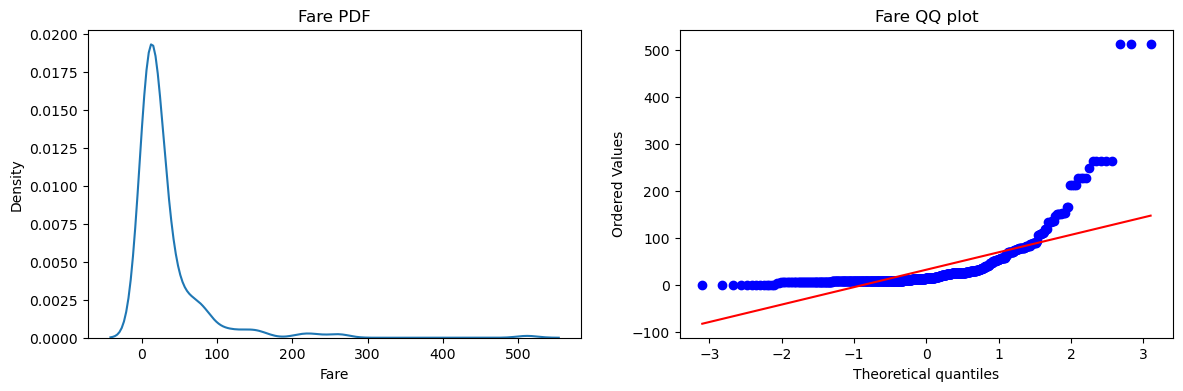

In [147]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm' , plot=plt)
plt.title('Fare QQ plot')
plt.show()


It is right skwed so we can easily use log transformation for this to make it normal 

In [150]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [156]:
clf.fit(X_train , y_train)
clf2.fit(X_train , y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
print("Accuracy LR",accuracy_score(y_test , y_pred))
print("Accuracy DT",accuracy_score(y_test , y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


### np.log1p
np.log - 0 bhayo bhane 0 hunxa tara np.log+1 garyo bhane chai 1 add hunxa so we use np.log1p

In [159]:
trf = FunctionTransformer (func = np.log1p)

In [161]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

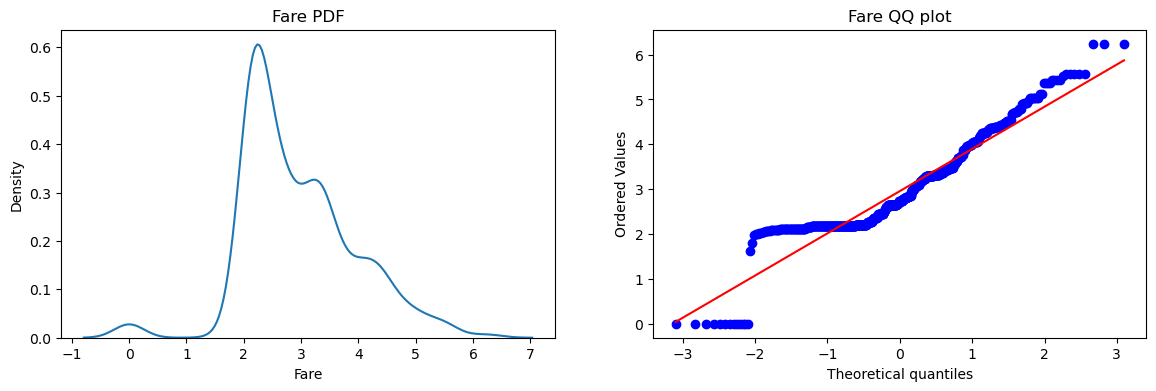

In [163]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train_transformed['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm' , plot=plt)
plt.title('Fare QQ plot')
plt.show()


Now it is normally distributed

In [166]:
clf = LogisticRegression()
clf.fit(X_train_transformed , y_train)
clf2.fit(X_train_transformed , y_train)

DecisionTreeClassifier()

In [168]:
clf

LogisticRegression()

In [172]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [174]:
print("Accurage LR",accuracy_score(y_test , y_pred))

Accurage LR 0.7374301675977654


In [176]:
print("Accurage DT",accuracy_score(y_test , y_pred1))

Accurage DT 0.5921787709497207


So function transformer use garera transform garda logistic regression ma accuracy badyo agina kam ako thyo ahile dherai ayo

In [181]:
X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR", np.mean(cross_val_score(clf,X_transformed , y,scoring='accuracy',cv=10)))
print("DT", np.mean(cross_val_score(clf2,X_transformed , y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588389513108616


Text(0.5, 1.0, 'Flare after log')

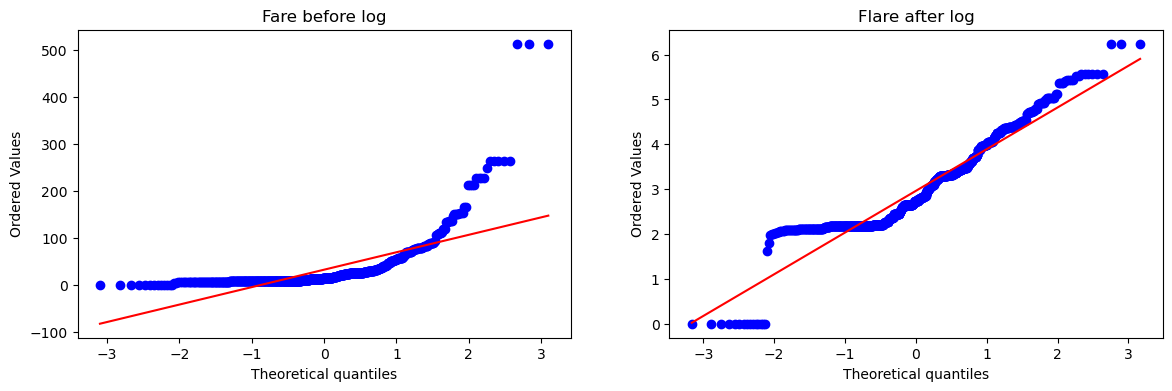

In [189]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare before log')
plt.subplot(122)
stats.probplot(X_transformed['Fare'],dist='norm',plot=plt)
plt.title('Flare after log')

Thus aba QQplot straight line ma ayo so it is normally distributed

### AGE

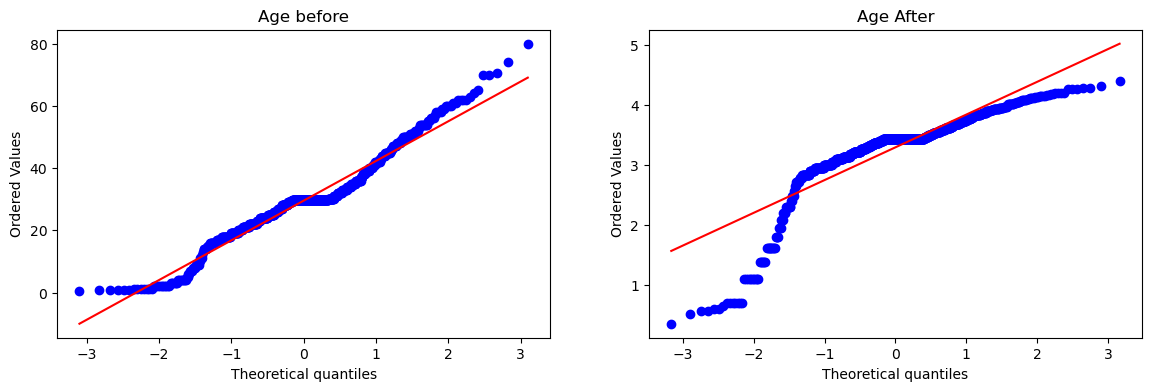

In [195]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age before')
plt.subplot(122)
stats.probplot(X_transformed['Age'],dist='norm',plot=plt)
plt.title('Age After')
plt.show()

Age ko ta pailai ramro thyo tara esma log transformation kam lagena

In [198]:
trf2 = ColumnTransformer(
    [('log' ,FunctionTransformer(np.log1p),['Fare'])],remainder= 'passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [200]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [206]:
clf.fit(X_train_transformed2 , y_train)
clf2.fit(X_train_transformed2 , y_train)

DecisionTreeClassifier()

In [210]:
y_pred = clf.predict(X_test_transformed2)
y_pred2  = clf2.predict(X_test_transformed2)

In [212]:
print('Accuracy LR',accuracy_score(y_test , y_pred))
print('Accuracy LR',accuracy_score(y_test , y_pred2))

Accuracy LR 0.6703910614525139
Accuracy LR 0.664804469273743


In [214]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.61729088639201


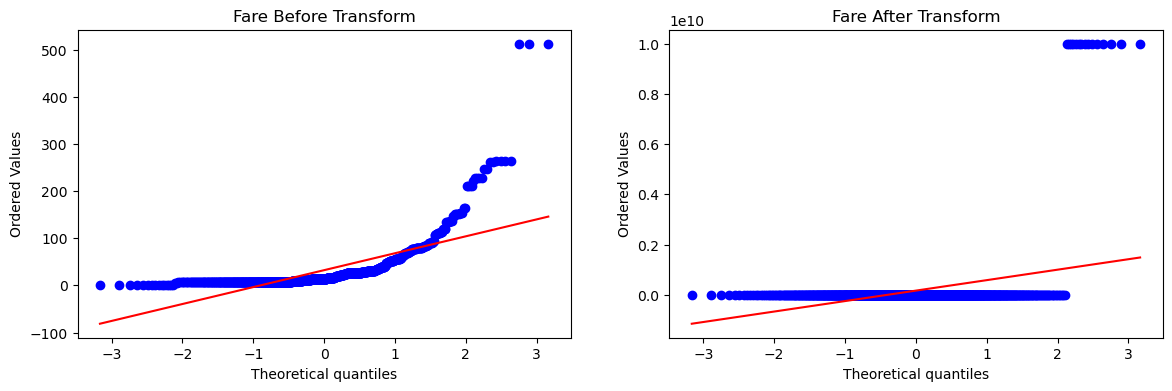

In [234]:
apply_transform(lambda x:1/(x + 0.0000000001))

Accuracy 0.6195131086142323


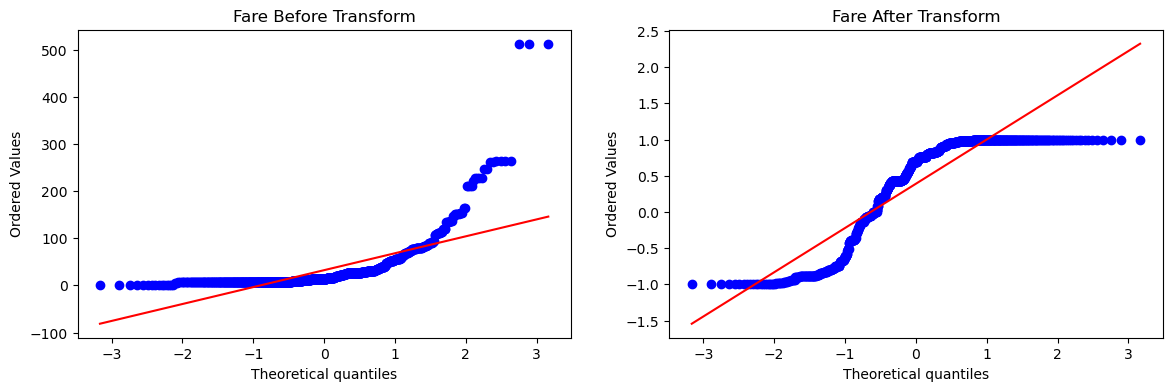

In [238]:
apply_transform(np.sin)
